In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
y_train[0]

9

In [6]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [7]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

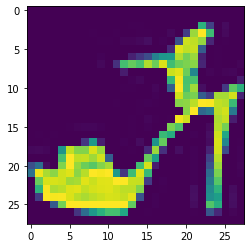

In [8]:
plt.imshow(X_train[9])

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [10]:
len(class_names)

10

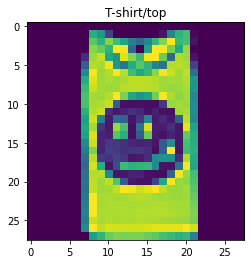

In [11]:
plt.imshow(X_train[101])
plt.title(class_names[y_train[101]])
plt.show()

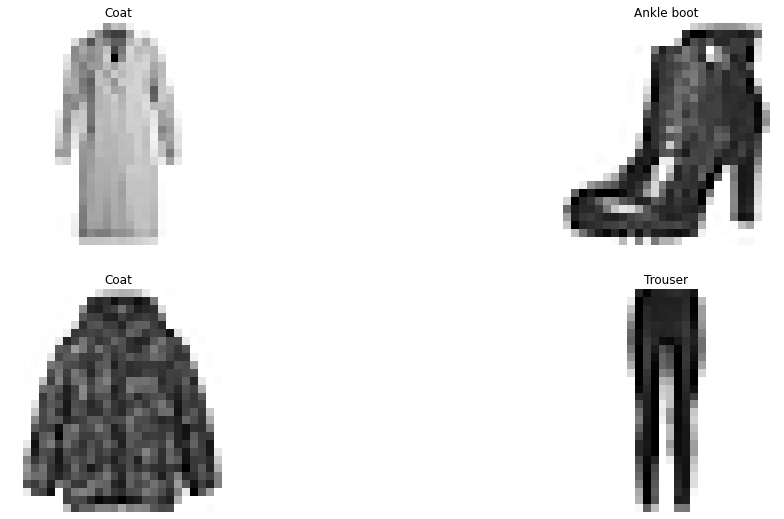

In [12]:
import random

plt.figure(figsize=(18, 9 ))

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    random_index = random.choice(range(len(X_train)))
    plt.imshow(X_train[random_index], cmap= plt.cm.binary)
    plt.title(class_names[y_train[random_index]])
    plt.axis(False)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])



model.compile(loss=SparseCategoricalCrossentropy(), optimizer='adam', metrics='accuracy')

In [16]:
non_norm_history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3535 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0940 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy:

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [18]:
X_train.min(), X_train.max()

(0, 255)

In [19]:
X_train = X_train/255.0
X_test = X_test/255.0

In [20]:
X_train.min(), X_train.max()

(0.0, 1.0)

In [21]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])


model.compile(loss = SparseCategoricalCrossentropy(), optimizer = 'adam', metrics='accuracy')

In [22]:
norm_history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

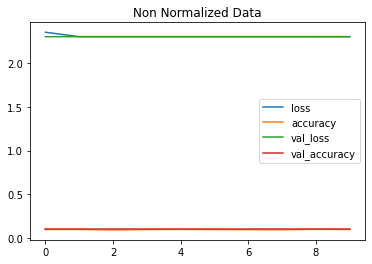

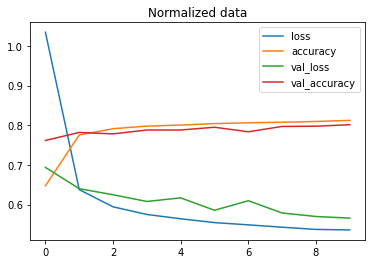

In [23]:
pd.DataFrame(non_norm_history.history).plot(title = "Non Normalized Data")

pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [24]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

model.compile(loss=SparseCategoricalCrossentropy(), metrics='accuracy', optimizer='adam')

lr_Scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))

In [25]:
find_lr_history = model.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test), callbacks=lr_Scheduler)

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

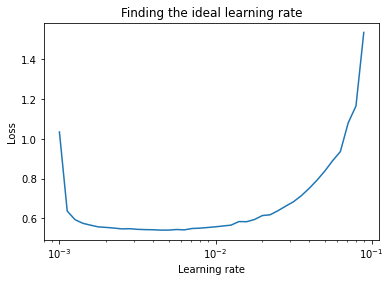

In [26]:
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) 
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [27]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])


model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), 
                 metrics=["accuracy"])

C:\Users\SURIYA\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [28]:
model.fit(X_train, y_train , epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [29]:
def plot_random_image(model, images, true_labels, classes):

    i = random.randint(0, len(images))
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28)) 
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    
    
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
    
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

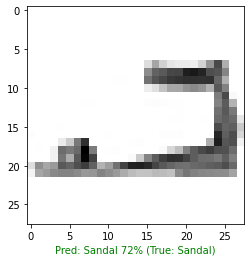

In [35]:
plot_random_image(model=model, 
                  images=X_test, 
                  true_labels=y_test, 
                  classes=class_names)

In [36]:
model.layers

In [38]:
weights, biases = model.layers[1].get_weights()


In [39]:
weights, weights.shape

(array([[ 0.71502626, -0.06077059, -0.9976309 , -1.048431  ],
        [ 0.27732146, -0.4715531 , -0.52916497,  0.0232924 ],
        [ 0.7752429 ,  0.5402764 , -1.1288569 , -0.7426154 ],
        ...,
        [-0.39453396,  0.47628734, -0.22641546,  0.25505972],
        [-0.40515843,  0.6181003 ,  0.23928395, -0.5038761 ],
        [ 0.23884606,  0.11606937, -0.12131338,  0.0435239 ]],
       dtype=float32),
 (784, 4))

In [40]:
biases, biases.shape

(array([ 2.4486223e-02, -6.1508128e-04, -2.7230155e-01,  8.1124914e-01],
       dtype=float32),
 (4,))